In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import config


from intraday_handler import (
	intraday_read_csv_correct_time,
	intraday_feature_trend,
	intraday_expected_cum_rvol,
	intraday_rvol
)

from intraday_viz import(
	intraday_feature_trend_viz,
	intraday_rvol_viz,
)


In [2]:
stock_ticker = config.stock_ticker
look_back_days_hourly = 5

In [3]:
df_rth = intraday_read_csv_correct_time(config.INTRADAY_FILEPATH)

In [4]:
## default config 1 month intraday data
df_rth = intraday_read_csv_correct_time(config.INTRADAY_FILEPATH)
intraday_volume_df = intraday_feature_trend(df_rth, "volume",look_back_days_hourly)
intraday_expected_cum_rvol_df = intraday_expected_cum_rvol(df_rth, look_back_days_hourly)
intraday_rvol_df = intraday_rvol(df_rth, intraday_expected_cum_rvol_df, look_back_days_hourly)

In [5]:
intraday_rvol_df

,close,volume,CumVolume,Expected_Cum_Vol_5,Intraday_RVOL_5
date,,,,,
2025-08-07 10:00:00,68.7100,1491547.0,1491547.0,NaN,NaN
2025-08-07 11:00:00,68.2800,1127773.0,2619320.0,NaN,NaN
2025-08-07 12:00:00,68.0200,1051747.0,3671067.0,NaN,NaN
2025-08-07 13:00:00,68.0950,986402.0,4657469.0,NaN,NaN
2025-08-07 14:00:00,67.9350,696328.0,5353797.0,NaN,NaN
...,...,...,...,...,...
2025-09-05 12:00:00,68.5500,479979.0,2707620.0,3433215.0,0.788654
2025-09-05 13:00:00,68.1819,536030.0,3243650.0,3998525.8,0.811211
2025-09-05 14:00:00,68.3561,504513.0,3748163.0,4492816.4,0.834257


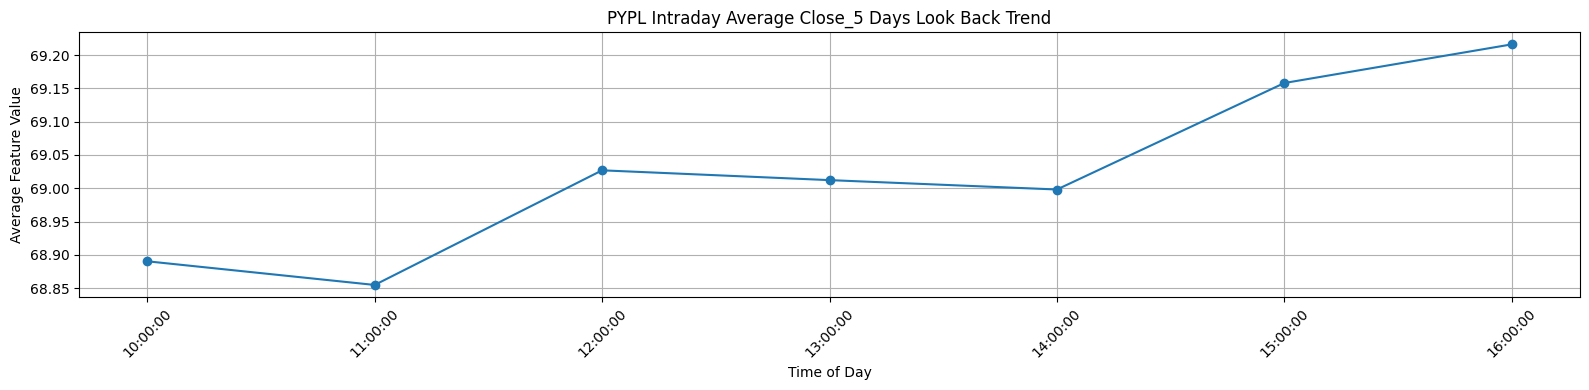

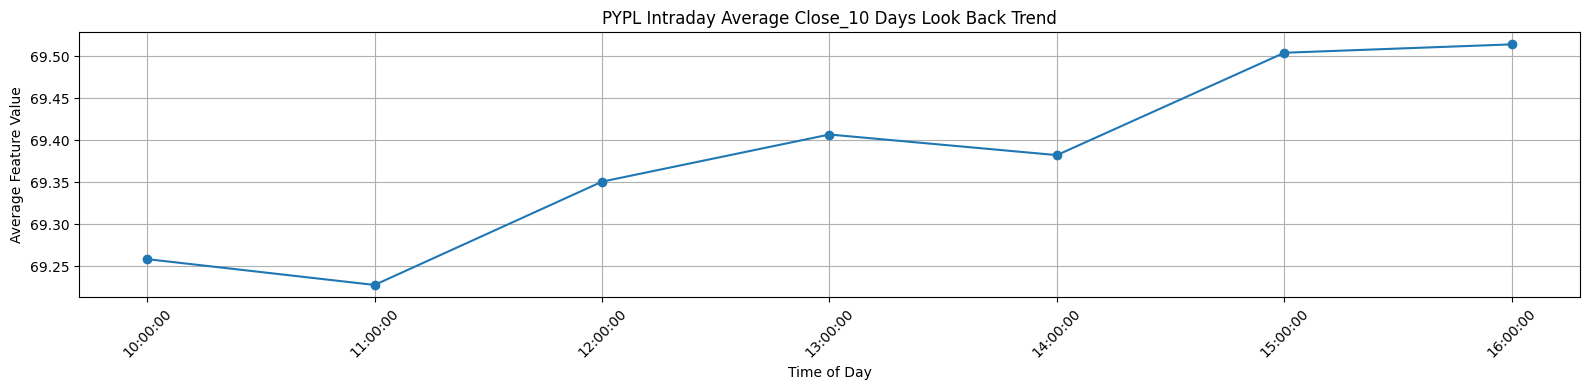

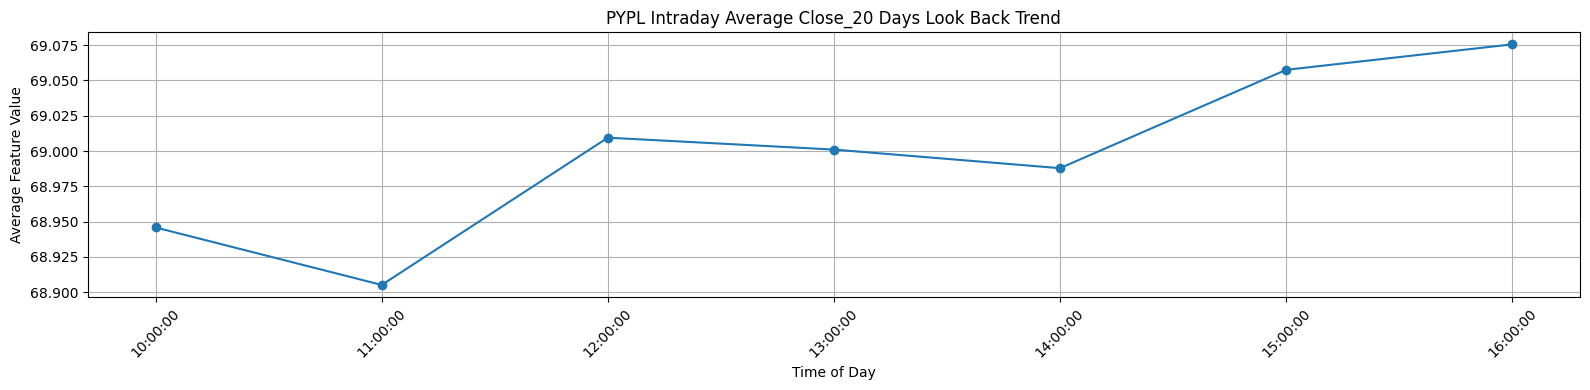

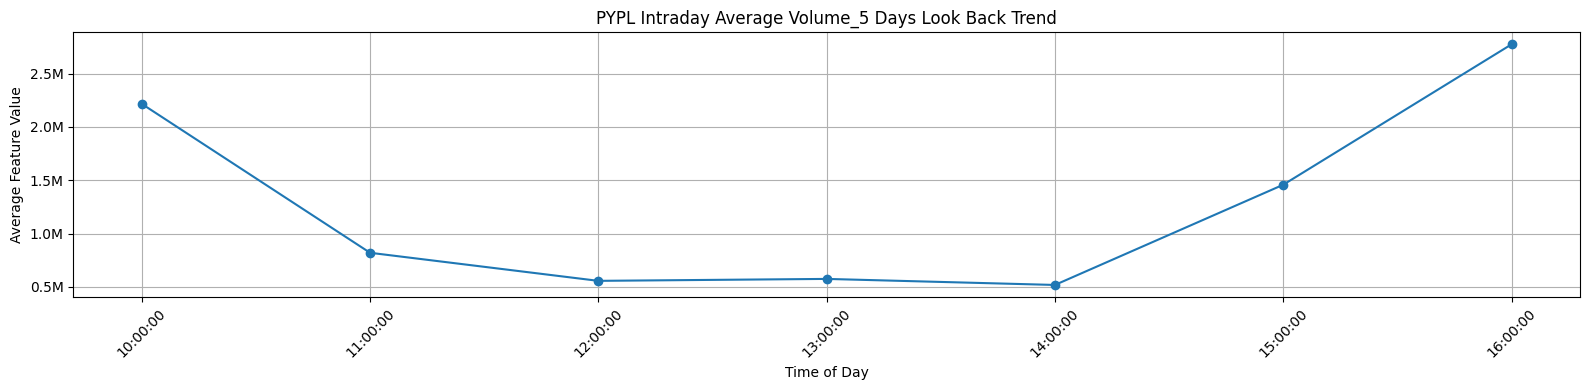

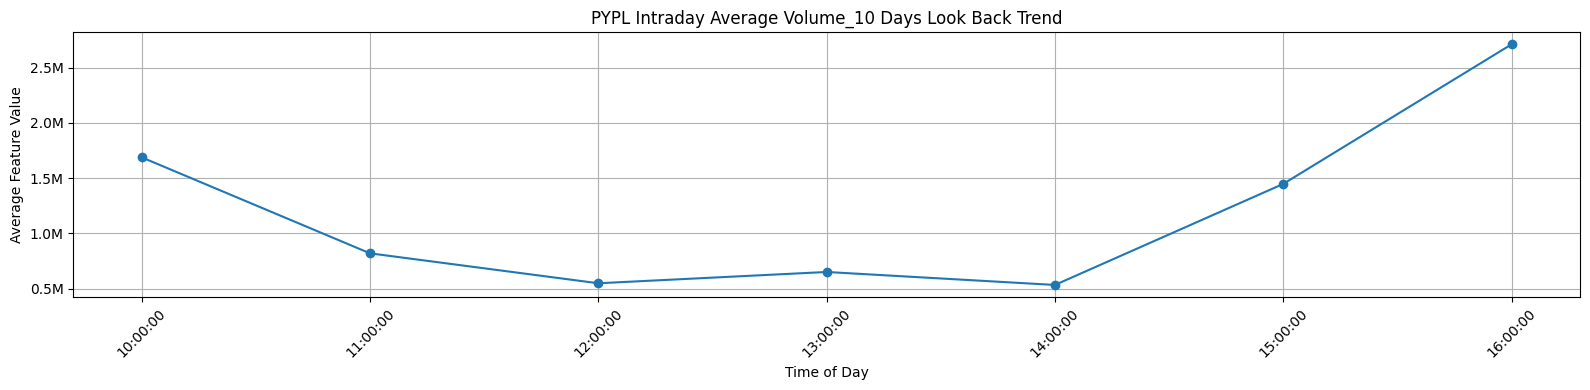

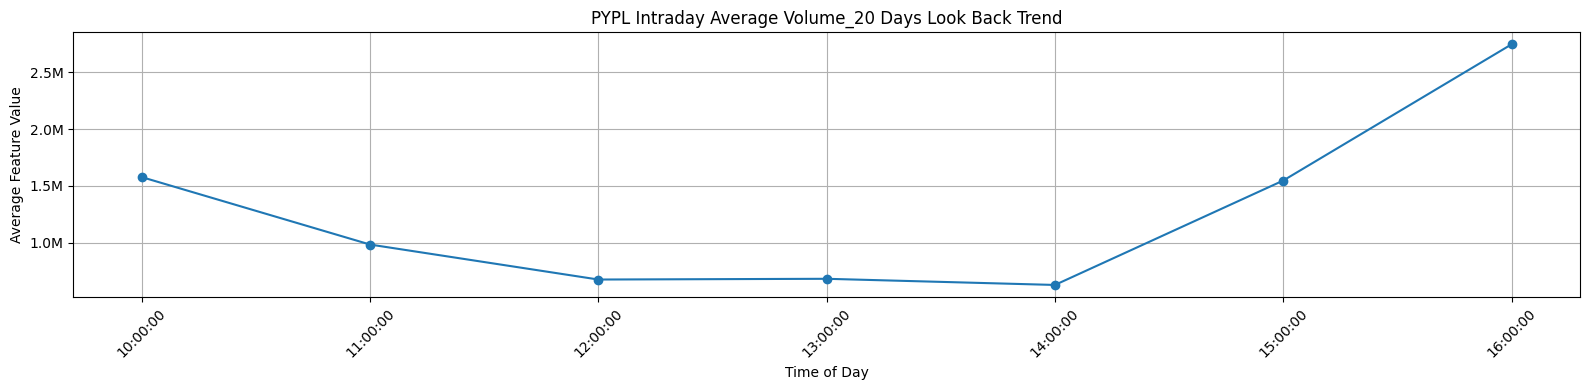

In [6]:

for intraday_rolling_window in [5,10,20]:
    intraday_close_df = intraday_feature_trend(df_rth, "close",intraday_rolling_window)
    intraday_feature_trend_viz(intraday_close_df)

for intraday_rolling_window in [5,10,20]:
    intraday_volume_df = intraday_feature_trend(df_rth, "volume",intraday_rolling_window)
    intraday_feature_trend_viz(intraday_volume_df)

In [7]:
intraday_rvol_df

,close,volume,CumVolume,Expected_Cum_Vol_5,Intraday_RVOL_5
date,,,,,
2025-08-07 10:00:00,68.7100,1491547.0,1491547.0,NaN,NaN
2025-08-07 11:00:00,68.2800,1127773.0,2619320.0,NaN,NaN
2025-08-07 12:00:00,68.0200,1051747.0,3671067.0,NaN,NaN
2025-08-07 13:00:00,68.0950,986402.0,4657469.0,NaN,NaN
2025-08-07 14:00:00,67.9350,696328.0,5353797.0,NaN,NaN
...,...,...,...,...,...
2025-09-05 12:00:00,68.5500,479979.0,2707620.0,3433215.0,0.788654
2025-09-05 13:00:00,68.1819,536030.0,3243650.0,3998525.8,0.811211
2025-09-05 14:00:00,68.3561,504513.0,3748163.0,4492816.4,0.834257


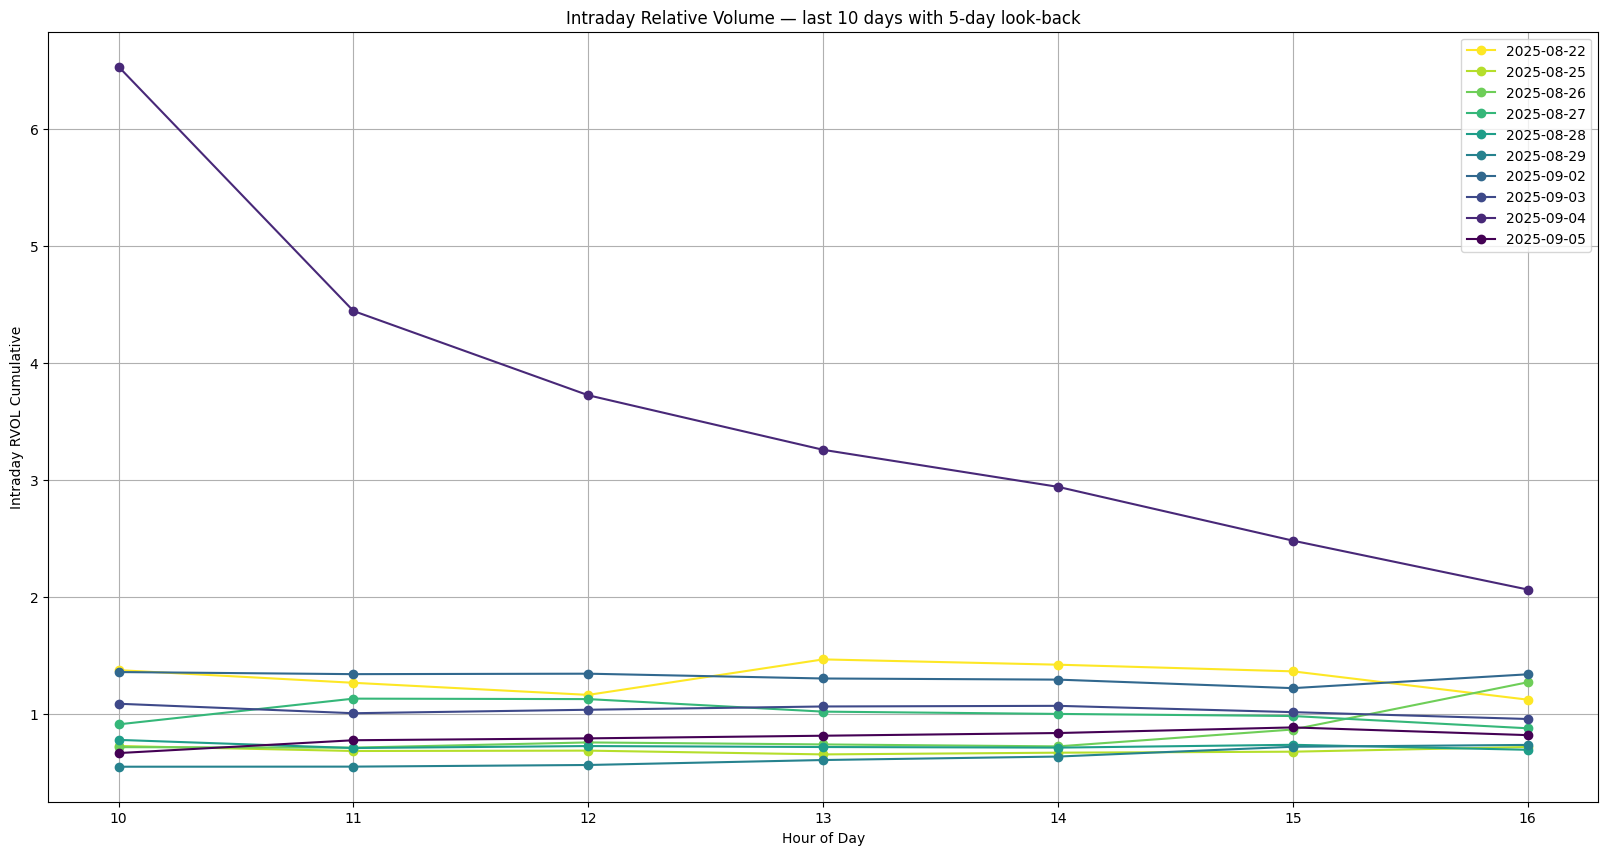

In [8]:
intraday_rvol_viz(intraday_rvol_df, look_back_period=look_back_days_hourly, show_n_days=10)